In [14]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)
  
mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)
  
mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)
  
mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3748\1011335242.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3748\1011335242.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]])


In [16]:
data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

In [17]:
def plot(data, centroids):
    plt.scatter(data[:,0],data[:,1],marker='.',color='gray',label='Data Points')
    plt.scatter(centroids[:-1,0],centroids[:-1,1],color='black',label='Previously Selected Centroid')
    plt.scatter(centroids[-1,0],centroids[-1,1],color='red',label='Newly Selected Centroid')
    plt.title('Select %d th centroid'%(centroids.shape[0]))
    plt.legend()
    plt.xlim(-5,12)
    plt.ylim(-10,15)
    plt.show()

In [18]:
def distance(p1, p2):
    return np.sum((p1 - p2)**2)

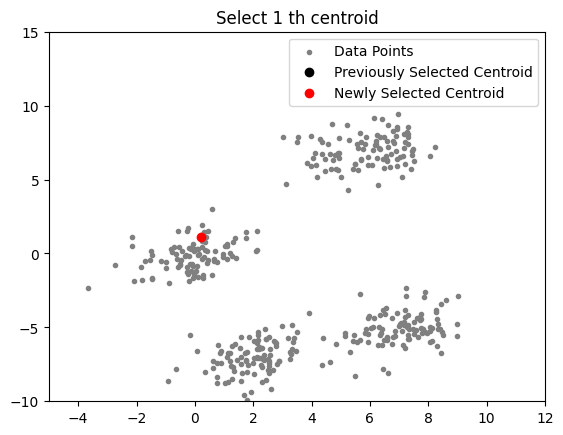

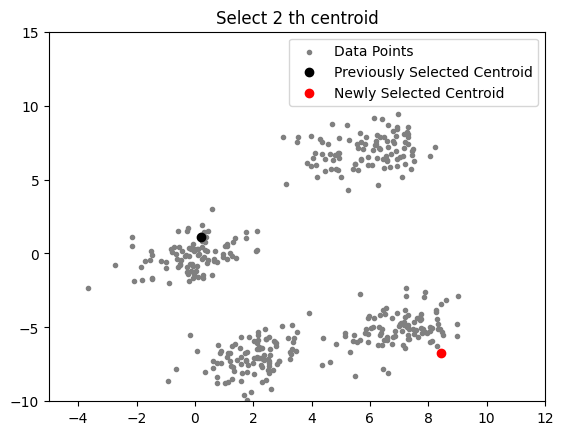

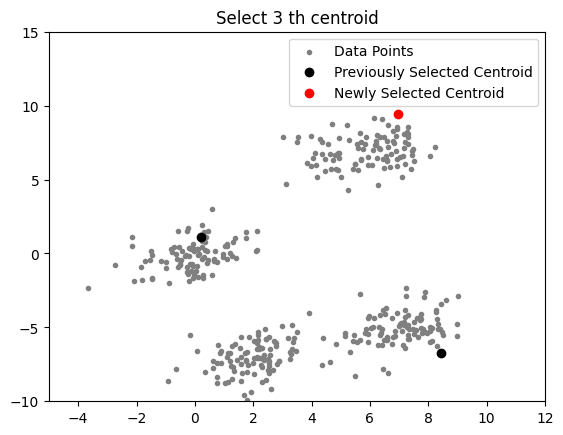

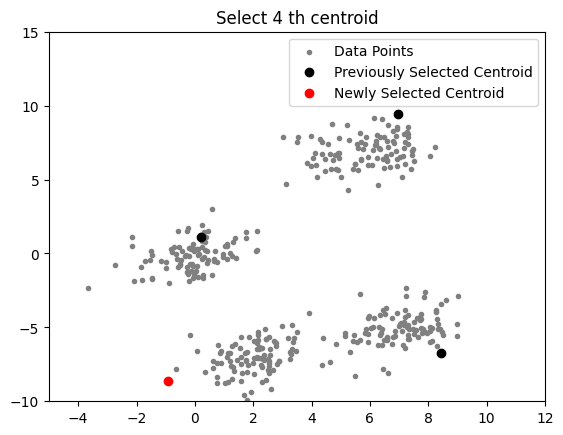

In [19]:
def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids
# call the initialize function to get the centroids
centroids = initialize(data, k = 4)